# Imports

In [1]:
# Adding parent dir to sys.path to import functions
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")
from data.data_handler import Data
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

c:\Users\bjham\Documents\programming\venvs\predict-at-bat-outcome\dev\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Get Data

In [2]:
abs = Data('F:/baseball/active_player_abs')

# Testing Data Redistribution

In [19]:
# cleaning step the model takes first
data = abs.data.copy()

drop = ['sac_fly_double_play', 'batter_interference',
    'sac_bunt_double_play', 'hit_by_pitch', 'interf_def']
field_out = ['fielders_choice', 'triple_play','sac_bunt',
    'fielders_choice_out', 'double_play', 'field_error',
    'force_out', 'grounded_into_double_play', 'sac_fly']
strikeout = ['strikeout_double_play']
walk = ['intent_walk']

data = data.loc[~data.result.isin(drop)]
data.loc[data.result.isin(field_out), ['result']] = 'field_out'
data.loc[data.result.isin(strikeout), ['result']] = 'strikeout'
data.loc[data.result.isin(walk), ['result']] = 'walk'
data = data.fillna(0.)
data = data.loc[~data.result.isin(('strikeout','walk'))]

In [20]:
display(data.result.value_counts())

field_out    357206
single       114012
double        36092
home_run      26138
triple         3672
Name: result, dtype: int64

In [21]:
row_ceil = 40_000
field_outs = data.loc[data.result.eq('field_out'), 'result'].count()
reduced_field_outs = field_outs - row_ceil
singles = data.loc[data.result.eq('single'), 'result'].count()
reduced_singles = singles - row_ceil

data = data.drop(data[data['result'].eq('field_out')].sample(reduced_field_outs).index)
data = data.drop(data[data['result'].eq('single')].sample(reduced_singles).index)
display(data.result.value_counts())

single       40000
field_out    40000
double       36092
home_run     26138
triple        3672
Name: result, dtype: int64

<AxesSubplot: >

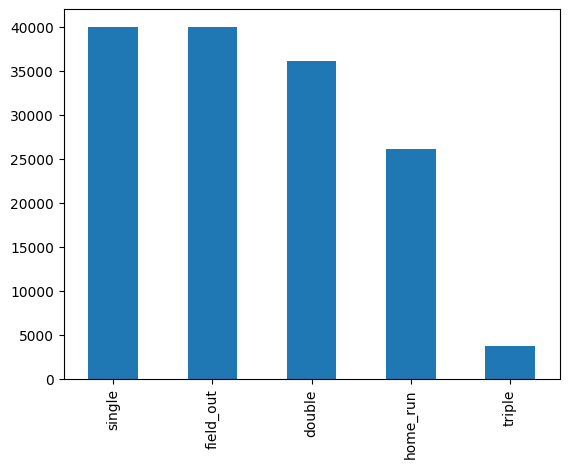

In [22]:
data.result.value_counts().plot(kind='bar')

In [2]:
# Looking at change in data_handler.py
from data.data_handler import Data
abs = Data('F:/baseball/active_player_abs')
abs.clean()
abs.data.result.value_counts()

field_out    40000
single       40000
double       36092
home_run     26138
triple        3672
Name: result, dtype: int64